# Machine Learning

## Linear Regression

## TensorFlow, Pandas, Numpy, Matplotlib & Scikit-learn

In [36]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [37]:
x_data = np.linspace(-5,5,10000)

In [38]:
m = .3

In [39]:
b = 1

In [40]:
y = m * x_data + b

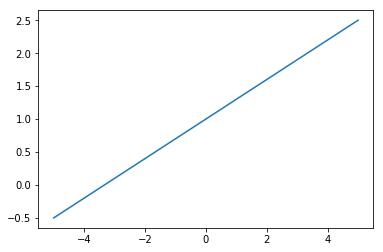

In [41]:
plt.plot(x_data,y)

In [42]:
noise = np.random.randn(len(x_data))

In [43]:
y_data = (m * x_data) + b + noise

In [44]:
x_df = pd.DataFrame(data=x_data,columns=["X"])

In [45]:
y_df = pd.DataFrame(data=y_data,columns=["Y"])

In [46]:
xy_data = pd.concat([x_df,y_df],axis=1)

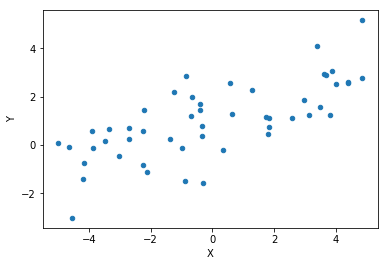

In [47]:
xy_data.sample(n=50).plot(kind="scatter",x="X",y="Y")

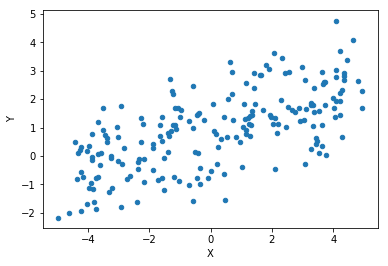

In [48]:
xy_data.sample(n=200).plot(kind="scatter",x="X",y="Y")

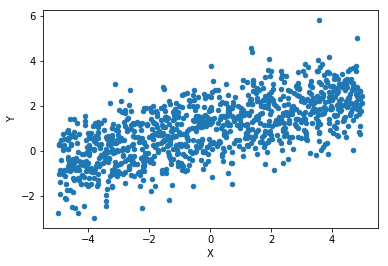

In [49]:
xy_data.sample(n=1000).plot(kind="scatter",x="X",y="Y")

In [50]:
feature_cols = [tf.feature_column.numeric_column("x",shape=[1])]

In [51]:
estimator = tf.estimator.LinearRegressor(feature_columns=feature_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/z6/vzs6bsnx4hn2qr27y9pzrrmw0000gn/T/tmppcqh98rb', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a2c1330b8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [52]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

In [53]:
input_func = tf.estimator.inputs.numpy_input_fn({"x":x_train}, y_train, batch_size=10, num_epochs=None,shuffle=True)

In [54]:
train_input_func = tf.estimator.inputs.numpy_input_fn({"x":x_train}, y_train, batch_size=10, num_epochs=1000,shuffle=False)

In [55]:
test_input_func = tf.estimator.inputs.numpy_input_fn({"x":x_test}, y_test, batch_size=10, num_epochs=1000,shuffle=False)

In [56]:
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/z6/vzs6bsnx4hn2qr27y9pzrrmw0000gn/T/tmppcqh98rb/model.ckpt.
INFO:tensorflow:loss = 26.422771, step = 1
INFO:tensorflow:global_step/sec: 541.823
INFO:tensorflow:loss = 2.6433842, step = 101 (0.186 sec)
INFO:tensorflow:global_step/sec: 806.353
INFO:tensorflow:loss = 8.535937, step = 201 (0.123 sec)
INFO:tensorflow:global_step/sec: 792.564
INFO:tensorflow:loss = 11.485654, step = 301 (0.126 sec)
INFO:tensorflow:global_step/sec: 808.937
INFO:tensorflow:loss = 6.0617065, step = 401 (0.124 sec)
INFO:tensorflow:global_step/sec: 803.879
INFO:tensorflow:loss = 13.774183, step = 501 (0.125 sec)
INFO:tensorflow:global_step/sec: 563.551
INFO:tensorflow:loss = 6.973468, step = 601 (0.180 sec)
INFO:tensorflow

In [57]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-26-04:04:05
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/z6/vzs6bsnx4hn2qr27y9pzrrmw0000gn/T/tmppcqh98rb/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-03-26-04:04:07
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.014788, global_step = 1000, label/mean = 1.0062348, loss = 10.14788, prediction/mean = 1.0573088
INFO:tensorflow:Saving 'c

In [58]:
test_metrics = estimator.evaluate(input_fn=test_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-26-04:04:10
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/z6/vzs6bsnx4hn2qr27y9pzrrmw0000gn/T/tmppcqh98rb/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-03-26-04:04:11
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.006349, global_step = 1000, label/mean = 1.0015618, loss = 10.063489, prediction/mean = 1.0529032
INFO:tensorflow:Saving '

In [59]:
x_points = np.linspace(-5,5,100)
input_fn_predict = tf.estimator.inputs.numpy_input_fn({"x":x_points}, shuffle=False)

In [60]:
predictions = estimator.predict(input_fn=input_fn_predict)

In [61]:
predictions_array = np.array([item['predictions'][0] for item in predictions])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/z6/vzs6bsnx4hn2qr27y9pzrrmw0000gn/T/tmppcqh98rb/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


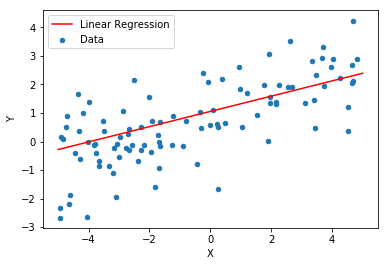

In [63]:
xy_data.sample(n=100).plot(kind="scatter",x="X",y="Y")
plt.plot(x_points,predictions_array,"r")
plt.legend(("Linear Regression","Data"))